In [124]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
#统计人工检测结果
rootDir = '/home/yfliu/manual_inspection/'
conPathList = ['/home/yfliu/manual_inspection/after/segment_0.8.csv','/home/yfliu/manual_inspection/after/segment_0.9.csv']
funPathList = ['/home/yfliu/manual_inspection/after_function/segment_0.8.csv','/home/yfliu/manual_inspection/after_function/segment_0.9.csv']
'''
code_contract = pd.read_csv('/home/yfliu/oldFolder/16w_contract_v2.csv')
snippet_contract = pd.read_csv('/home/yfliu/oldFolder/snippet_contract_v2.csv').drop_duplicates(['dealed_code'])
code_function = pd.read_csv('/home/yfliu/paper/trash/temp_csv/16w_function_v2.csv')
snippet_function = pd.read_csv('/home/yfliu/oldFolder/snippet_function_v2.csv').drop_duplicates(['dealed_code'])'''

"\ncode_contract = pd.read_csv('/home/yfliu/oldFolder/16w_contract_v2.csv')\nsnippet_contract = pd.read_csv('/home/yfliu/oldFolder/snippet_contract_v2.csv').drop_duplicates(['dealed_code'])\ncode_function = pd.read_csv('/home/yfliu/paper/trash/temp_csv/16w_function_v2.csv')\nsnippet_function = pd.read_csv('/home/yfliu/oldFolder/snippet_function_v2.csv').drop_duplicates(['dealed_code'])"

In [134]:
con8 = pd.read_csv(funPathList[0]).sample(50)
con9 = pd.read_csv(funPathList[1]).sample(50) 
con = con9.append(con8).sort_values(by="bleu" , ascending=True) 

In [131]:
con8 = pd.read_csv(conPathList[0]).sample(100) 
del con8['wonder']
con9 = pd.read_csv(conPathList[1]).sample(100) 
del con9['Unnamed: 4']
con = con9.append(con8).sort_values(by="bleu" , ascending=True) 

In [126]:
def getCount(manRes):
    total = manRes[manRes['check'].apply(lambda x : x < 2)]
    type2 = manRes[manRes['check'].apply(lambda x : x >= 1 and x < 2)]
    type1 = manRes[manRes['check'].apply(lambda x : x < 1)]
    print(len(total) / len(manRes))#所有满足条件
    print(len(type2) / len(manRes))#类型2
    print(len(type1) / len(manRes))#类型1
    return total
#con9 = con9.sample(100)   
getCount(con9)
print('----')
#con8 = con8.sample(100)   
getCount(con8)
print('----')
count = getCount(con8.append(con9))

0.83
0.75
0.08
----
0.61
0.61
0.0
----
0.72
0.68
0.04


In [127]:
#count.to_csv('/home/yfliu/paper_data/RQ/RQ1/funCount.csv',index = False)
count.to_csv('/home/yfliu/paper_data/RQ/RQ1/conCount.csv',index = False)

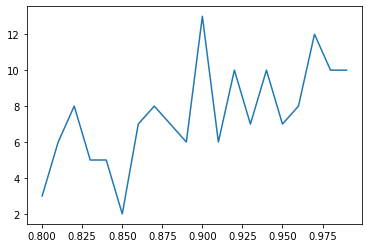

In [82]:
'''
l = []
for idx in range(len(xRange) - 1):
    xrange = [xRange[idx], xRange[idx + 1]]
    temp = con[con['bleu'].apply(lambda x : x >= xrange[0] and x < xrange[1])]
   
    l.append(len(temp[temp['check'].apply(lambda x : x < 2)]))
    xRange = list(np.arange(0.8,1,0.01))
xRange.append(1)x = list(np.arange(0.8,1,0.01))
plt.plot(x, l)

def barr(keys,values):
    fig = plt.figure(figsize=(8,4))
    plt.bar(keys, values)
    for a,b in zip(keys,values):
        plt.text(a, b+0.01, '%.0f' % b, ha='center', va= 'bottom')
    plt.xticks()
    plt.xlabel("Distribution of contract duplication")
    plt.ylabel("Contract count")
    plt.show()
num_count = [103,34,23,18,9,7,8,9,4,418]
barr(xRange,l)'''